To effectively analyze the influx of videos being uploaded at different times of the year, incorporating various plots through data visualization can be beneficial. By utilizing data visualization, it becomes easier to track and comprehend trends, allowing for a better understanding of when a significant number of videos are being uploaded. The project involves utilizing various data visualization techniques to gain insights from Californian data. To ensure that valuable insights are generated, data analysis will also be conducted. The first step in the process will involve importing necessary libraries for data visualization. Once the libraries have been imported, they will be utilized to analyze and visualize the data. This approach is crucial in adding value to the data and extracting meaningful insights from it.

In [117]:
# import Libraries
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import json
sns.set_palette('Dark2')
import warnings
warnings.filterwarnings('ignore')

The initial step of the project involves reading the data, which includes both a '.csv' file and a '.json' file. As the information is present in both formats, it is essential to establish a connection between the two files to comprehend the data. This will facilitate the mapping of data to specific rows and columns within a dataframe in the '.csv' file.

In [118]:
# Reading the data
df = pd.read_csv(r'C:\Users\uset\Desktop\Youtube_Analysis\CAvideos.csv')
open_file = open(r'C:\Users\uset\Desktop\Youtube_Analysis\CA_category_id.json')
df_category_json = json.load(open_file)

In [119]:
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,🎧: https://ad.gt/yt-perfect\n💰: https://atlant...


In [191]:
# type of the Json file
print((type(df_category_json)))

<class 'dict'>


As the data present in the '.json' files are stored in the form of dictionaries, it follows a key-value pair format. To extract values from a dictionary, a key must be specified, which will enable the retrieval of the value associated with it.

In [192]:
df_category_json['kind']

'youtube#videoCategoryListResponse'

In [193]:
type(df_category_json['items'])

list

The following steps were performed to extract useful information from the '.json' file and determine its length and the number of elements present

In [194]:
#The total number of items that are present in the json file 
print((len(df_category_json['items'])))

31


The '.csv' files only contain the Category ID without any details about the category name. The actual names and categories are provided in the '.json' files. Therefore, it is necessary to establish a relationship between the two files to extract useful information and apply all the category information correctly.

## Countplots
Countplots are an effective method to visualize the number of features and their respective count. They can be used to represent the categorical values of a particular feature in the data using a bar plot. This approach enables a clear understanding of the count of different categories present in the features. In the project, countplots will be utilized to gain insight into the features present in the data.

The countplot reveals that category_ID 24 has the highest count, but the other IDs are not informative about the categories they represent. Therefore, it is necessary to map the category names from the '.json' files to the category IDs in the '.csv' file for a better understanding of the category count.

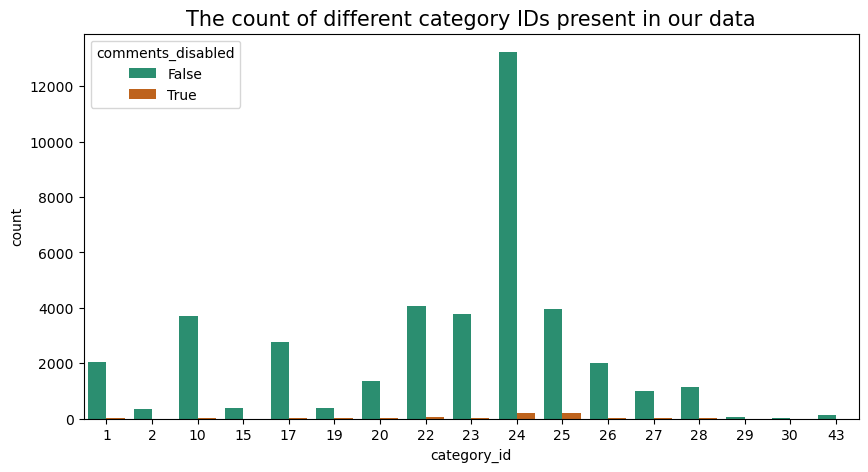

In [125]:
plt.figure(figsize = (10, 5))
sns.countplot(x = 'category_id', hue = 'comments_disabled', data = df)
plt.title("The count of different category IDs present in our data", fontsize = 15)
plt.show()

Upon inspecting the data description, it is evident that there are null values present in the dataset. However, the number of null values is relatively low compared to the total number of values in the dataset. Therefore, it is advisable to remove the null values so that we can obtain a better understanding of the data for analysis.

In [126]:
df.isnull().sum()

video_id                     0
trending_date                0
title                        0
channel_title                0
category_id                  0
publish_time                 0
tags                         0
views                        0
likes                        0
dislikes                     0
comment_count                0
thumbnail_link               0
comments_disabled            0
ratings_disabled             0
video_error_or_removed       0
description               1296
dtype: int64

In [195]:
#The number of null values present in the description column
print((df.isnull().sum()['description']))

0


In [196]:
#The length of the dataframe 
print(format(len(df)))

39585


To work with the data more effectively, we will remove the null values from the dataset.

In [197]:
df.dropna(inplace = True)
df.isnull().sum()

title                     0
channel_title             0
tags                      0
views                     0
likes                     0
dislikes                  0
comment_count             0
comments_disabled         0
ratings_disabled          0
video_error_or_removed    0
description               0
category                  0
trending_year             0
trending_day              0
trending_month            0
title_length              0
publish_year              0
publish_month             0
publish_day               0
description_length        0
dtype: int64

After examining the head of the data, it appears that some columns, such as video_id and thumbnail_link, are not useful for machine learning analysis. Therefore, these columns can be deleted from the dataset.

In [130]:
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,🎧: https://ad.gt/yt-perfect\n💰: https://atlant...


In [131]:
#An empty dictionary will be created and utilized to obtain the predictions.
titles_dict = dict()

Iterates through each item in the df_category_json dictionary and extracts the ID and title of each category. It then assigns the ID as the key and the category title as the value to the titles_dict dictionary.

In [132]:
for i in range(len(df_category_json['items'])):
    print(df_category_json['items'][i]['id'])
    print(df_category_json['items'][i]['snippet']['title'])
    id_number = int(df_category_json['items'][i]['id'])
    category = df_category_json['items'][i]['snippet']['title']
    titles_dict[id_number] = category
               

1
Film & Animation
2
Autos & Vehicles
10
Music
15
Pets & Animals
17
Sports
18
Short Movies
19
Travel & Events
20
Gaming
21
Videoblogging
22
People & Blogs
23
Comedy
24
Entertainment
25
News & Politics
26
Howto & Style
27
Education
28
Science & Technology
30
Movies
31
Anime/Animation
32
Action/Adventure
33
Classics
34
Comedy
35
Documentary
36
Drama
37
Family
38
Foreign
39
Horror
40
Sci-Fi/Fantasy
41
Thriller
42
Shorts
43
Shows
44
Trailers


Let us now examine the different categories and their associated values in the dataset. By mapping these values together, we can obtain better results.

In [133]:
print(titles_dict)

{1: 'Film & Animation', 2: 'Autos & Vehicles', 10: 'Music', 15: 'Pets & Animals', 17: 'Sports', 18: 'Short Movies', 19: 'Travel & Events', 20: 'Gaming', 21: 'Videoblogging', 22: 'People & Blogs', 23: 'Comedy', 24: 'Entertainment', 25: 'News & Politics', 26: 'Howto & Style', 27: 'Education', 28: 'Science & Technology', 30: 'Movies', 31: 'Anime/Animation', 32: 'Action/Adventure', 33: 'Classics', 34: 'Comedy', 35: 'Documentary', 36: 'Drama', 37: 'Family', 38: 'Foreign', 39: 'Horror', 40: 'Sci-Fi/Fantasy', 41: 'Thriller', 42: 'Shorts', 43: 'Shows', 44: 'Trailers'}


To obtain the actual category names for the respective category IDs, we will be mapping the titles dictionary to the category column in the dataframe. This will help us to better understand the data and gain meaningful insights. Additionally, since the category ID has been converted to the category name, we can now remove the category ID column as it is no longer needed.

In [134]:
df['category'] = df['category_id'].map(titles_dict)
df.drop('category_id', axis = 1, inplace = True)

In [136]:
df.head()

,video_id,trending_date,title,channel_title,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...,Music
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...,Comedy
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,Comedy
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,Entertainment
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,🎧: https://ad.gt/yt-perfect\n💰: https://atlant...,Music


We would drop the video id from the dataframe as it is not required.

In [137]:
df.drop('video_id', axis = 1, inplace = True)

We also see that we cannot infer much about thumbnail link as there is not much information in the '.json' files as well. Therefore, we would be dropping that column just to get to know our data better.

In [138]:
df.drop('thumbnail_link', axis = 1, inplace = True)

We would be looking at the ratings columns and see that there are 2 values present in it. 

In [139]:
df['ratings_disabled'].unique()


array([False,  True])

Let us now look at the different unique values present in video_error_or_removed respectively. We see that there are 2 unique values present.

In [140]:
df['video_error_or_removed'].unique()

array([False,  True])

A new function called "true_false_converter" has been created which converts True values to 1 and False values to 0. This function is used to convert Boolean values to numerical values for easier interpretation.

In [141]:
def true_false_converter(value):
    if value == True:
        return 1
    else:
        return 0

We will be using the function true_false_converter to convert the boolean values to numerical values (1 for True and 0 for False) for easier interpretation. Then, we will apply this function to our data and replace the old columns with the new binary ones.

In [ ]:
df['comments_disabled'] = df['comments_disabled'].apply(true_false_converter)
df['ratings_disabled'] = df['ratings_disabled'].apply(true_false_converter)
df['video_error_or_removed'] = df['video_error_or_removed'].apply(true_false_converter)

In [142]:
df.tail()

,trending_date,title,channel_title,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,category
40876,18.14.06,HOW2: How to Solve a Mystery,Annoying Orange,2018-06-13T18:00:07.000Z,"annoying orange|""funny""|""fruit""|""talking""|""ani...",80685,1701,99,1312,False,False,False,🚨 NEW MERCH! http://amzn.to/annoyingorange 🚨➤ ...,Entertainment
40877,18.14.06,Eli Lik Lik Episode 13 Partie 01,Elhiwar Ettounsi,2018-06-13T19:01:18.000Z,"hkayet tounsia|""elhiwar ettounsi""|""denya okhra...",103339,460,66,51,False,False,False,► Retrouvez vos programmes préférés : https://...,Entertainment
40878,18.14.06,KINGDOM HEARTS III – SQUARE ENIX E3 SHOWCASE 2...,Kingdom Hearts,2018-06-11T17:30:53.000Z,"Kingdom Hearts|""KH3""|""Kingdom Hearts 3""|""Froze...",773347,25900,224,3881,False,False,False,Find out more about Kingdom Hearts 3: https://...,Gaming
40879,18.14.06,Trump Advisor Grovels To Trudeau,The Young Turks,2018-06-13T04:00:05.000Z,"180612__TB02SorryExcuse|""News""|""Politics""|""The...",115225,2115,182,1672,False,False,False,Peter Navarro isn’t talking so tough now. Ana ...,News & Politics
40880,18.14.06,【完整版】遇到恐怖情人該怎麼辦？2018.06.13小明星大跟班,我愛小明星大跟班,2018-06-13T16:00:03.000Z,"吳宗憲|""吳姍儒""|""小明星大跟班""|""Sandy""|""Jacky wu""|""憲哥""|""中天...",107392,300,62,251,False,False,False,藝人：李妍瑾、玉兔、班傑、LaLa、小優、少少專家：陳筱屏(律師)、Wendy(心理師)、羅...,Entertainment


We would take a look at different tags and understand them respectively.

In [143]:
df['tags'][0]

'Eminem|"Walk"|"On"|"Water"|"Aftermath/Shady/Interscope"|"Rap"'

In [144]:
df['tags'][1]

'plush|"bad unboxing"|"unboxing"|"fan mail"|"idubbbztv"|"idubbbztv2"|"things"|"best"|"packages"|"plushies"|"chontent chop"'

## Countplot of Different Categories

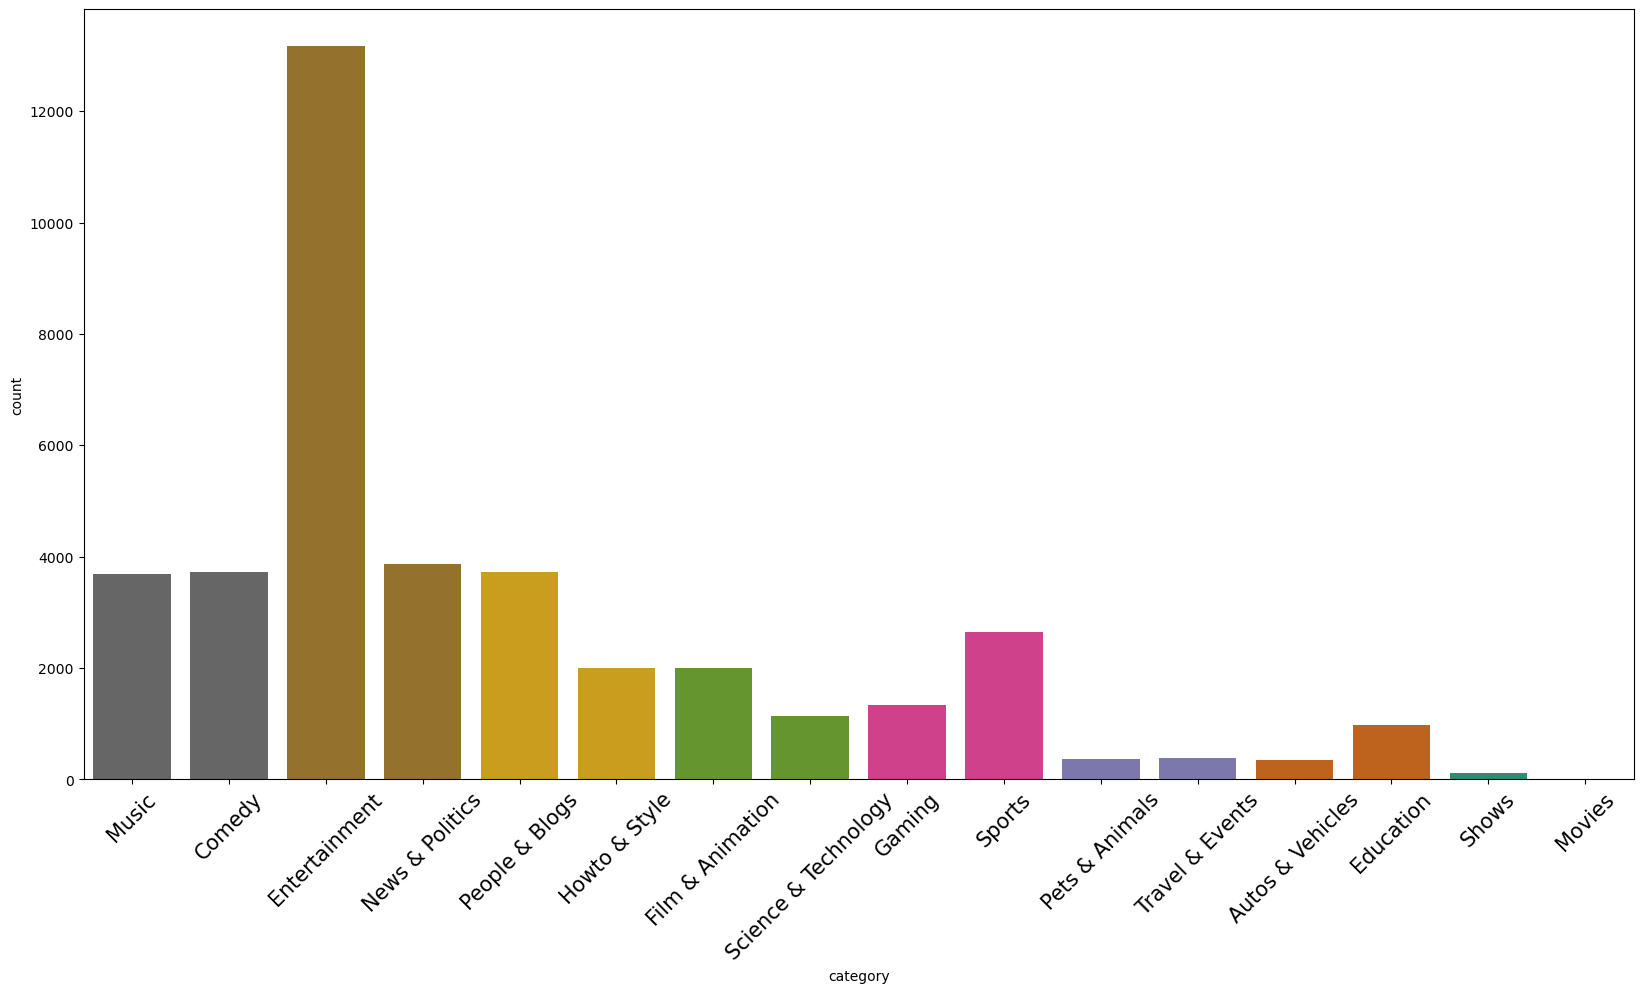

In [145]:
plt.figure(figsize = (20, 10))
plt.xticks(rotation = 45, fontsize = 15)
sns.countplot(df['category'], palette = 'Dark2_r')
plt.show()

In [146]:
#Checking the type of data
type(df['comments_disabled'][0])

numpy.bool_

In [147]:
#Looking at the number of comments disabled
df['comments_disabled'].unique()

array([False,  True])

In [148]:
df.shape

(39585, 14)

There are too many unique values present in the 'channel_title' column to use a countplot, as it would be difficult to visualize the count of each individual channel.

In [149]:
df['channel_title'].nunique()

4773

The generated plots below indicate that there are only a few videos where comments are disabled, while the majority of videos have comments enabled. This is consistent with real-world observations where disabling comments is a less common practice.

## Countplot of Comments Disabled

<AxesSubplot:xlabel='comments_disabled', ylabel='count'>

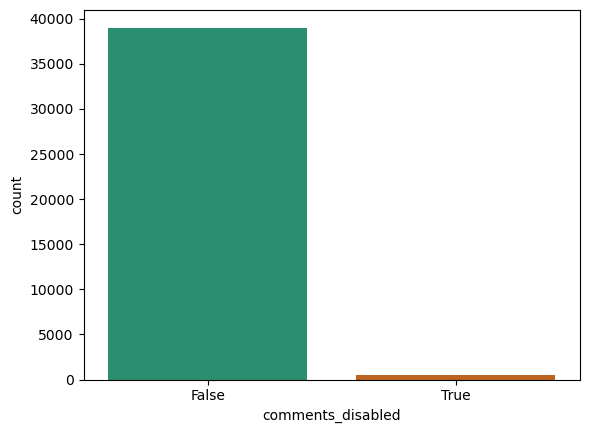

In [150]:
sns.countplot(x = 'comments_disabled', data = df)

## Countplot of Ratings Disabled

<AxesSubplot:xlabel='ratings_disabled', ylabel='count'>

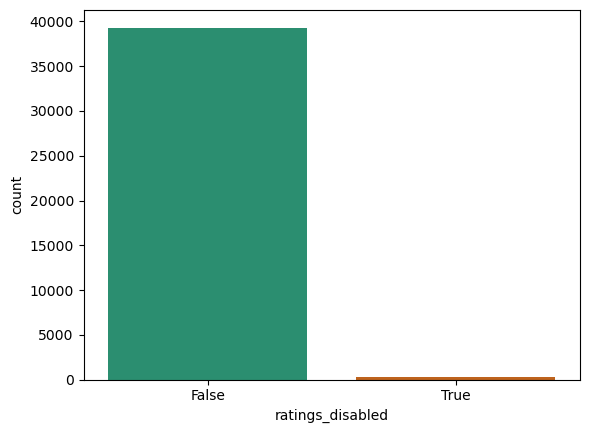

In [151]:
sns.countplot(df['ratings_disabled'])

## Countplot of Videos Error or Removed

<AxesSubplot:xlabel='video_error_or_removed', ylabel='count'>

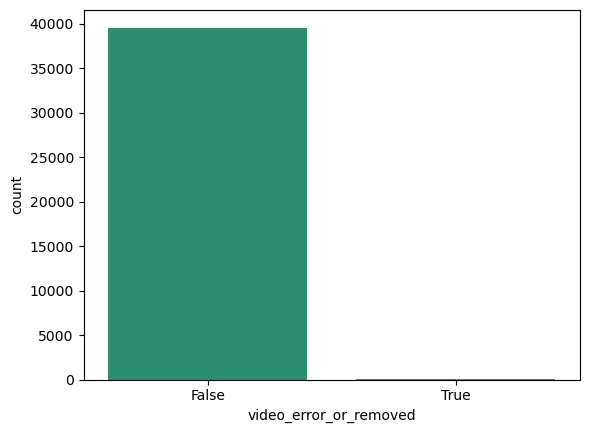

In [152]:
sns.countplot(df['video_error_or_removed'])

In [153]:
#The total number of videos which have been removed or there is error 
print((len(df[df['video_error_or_removed'] == 1])))

The total number of videos which have been removed or there is error are 27


We calculated the mean values of likes, dislikes, and comment counts for each category, and displayed them in a table. However, the data in the table is not easy to interpret, so we will create plots to better understand the results.

In [154]:
df.groupby('category').mean()[['views', 'likes', 'dislikes', 'comment_count']]

,views,likes,dislikes,comment_count
category,,,,
Autos & Vehicles,5.676173e+05,13555.859195,566.508621,2913.715517
Comedy,9.891344e+05,52293.700671,1434.022282,5210.148725
Education,5.370408e+05,21270.646640,803.415479,3014.707739
Entertainment,1.027834e+06,29272.942914,1947.986412,4178.594246
Film & Animation,1.459745e+06,38827.168916,1551.424288,5034.012494
Gaming,9.222066e+05,38750.436090,1830.503008,7250.983459
Howto & Style,7.845609e+05,25600.145145,864.553053,4173.187187
Movies,2.853415e+06,42150.833333,2046.666667,2329.833333
Music,3.556905e+06,152354.803518,5971.520704,14152.600271


### Grouping Average Views Based on Category

The sorted data reveals that music videos have the highest average number of views compared to movies, and the travel & events category has the lowest average number of views.

<AxesSubplot:xlabel='category'>

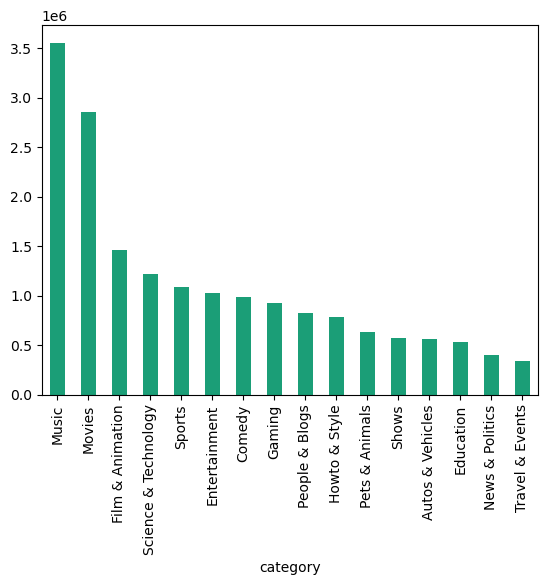

In [155]:
df.groupby('category').mean()['views'].sort_values(ascending = False).plot.bar()

### Grouping Likes Based on Categories

From the analysis of the data, it can be observed that music videos have the highest average number of likes compared to other categories such as comedy and movies. On the other hand, categories such as "News & Politics" and "Shows" receive lower average likes compared to categories such as "Music" and "Comedy".

<AxesSubplot:xlabel='category'>

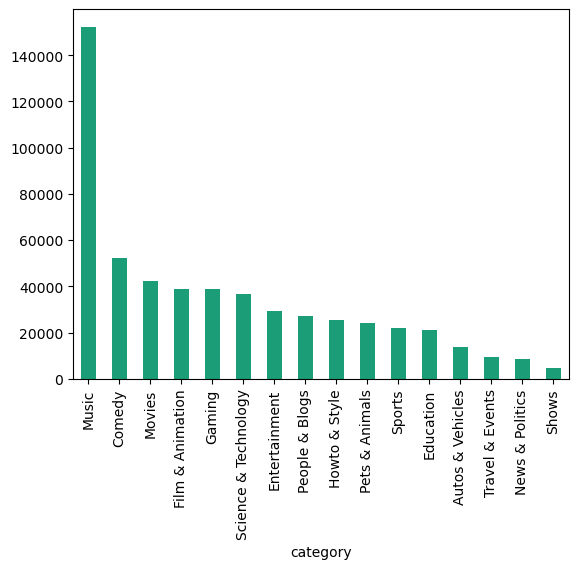

In [156]:
df.groupby('category').mean()['likes'].sort_values(ascending = False).plot.bar()

### Grouping Comments Based on Categories

Based on the analysis of the data, it is observed that the music videos have the highest average comment count. However, the "Shows" category has a very low number of values present in it. The "Music" videos have the highest average comment count, while the "News & Politics" and "Shows" categories have the lowest average comment counts. Additionally, the "Travel & Events" category has the second-lowest average comment count.

<AxesSubplot:xlabel='category'>

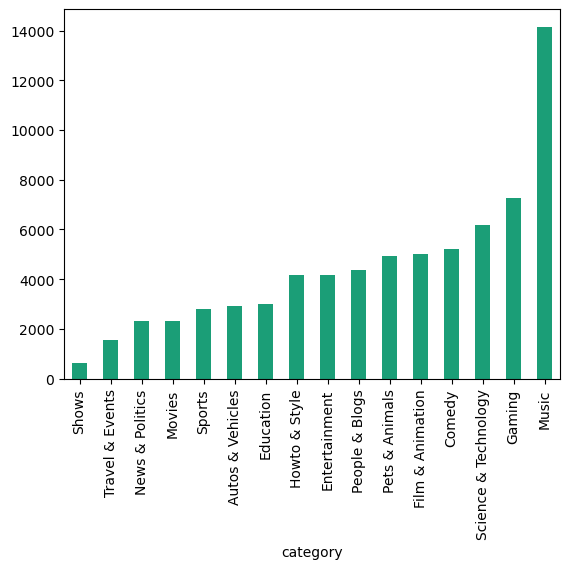

In [157]:
df.groupby('category').mean()['comment_count'].sort_values().plot.bar()

In [158]:
df.head()

,trending_date,title,channel_title,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,category
0,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...,Music
1,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,False,False,False,STill got a lot of packages. Probably will las...,Comedy
2,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,Comedy
3,17.14.11,I Dare You: GOING BALD!?,nigahiga,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,False,False,False,I know it's been a while since we did this sho...,Entertainment
4,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,False,False,False,🎧: https://ad.gt/yt-perfect\n💰: https://atlant...,Music


### Grouping Channels Based on Channel Title

The next step in the analysis is to explore the channel titles present in the data. The majority of the channels in the dataset are from SET India, followed by MSNBC. The frequency distribution of the channels is visualized in a graph, which shows that there is no significant difference between the most frequently occurring channels in the dataset.

<AxesSubplot:ylabel='channel_title'>

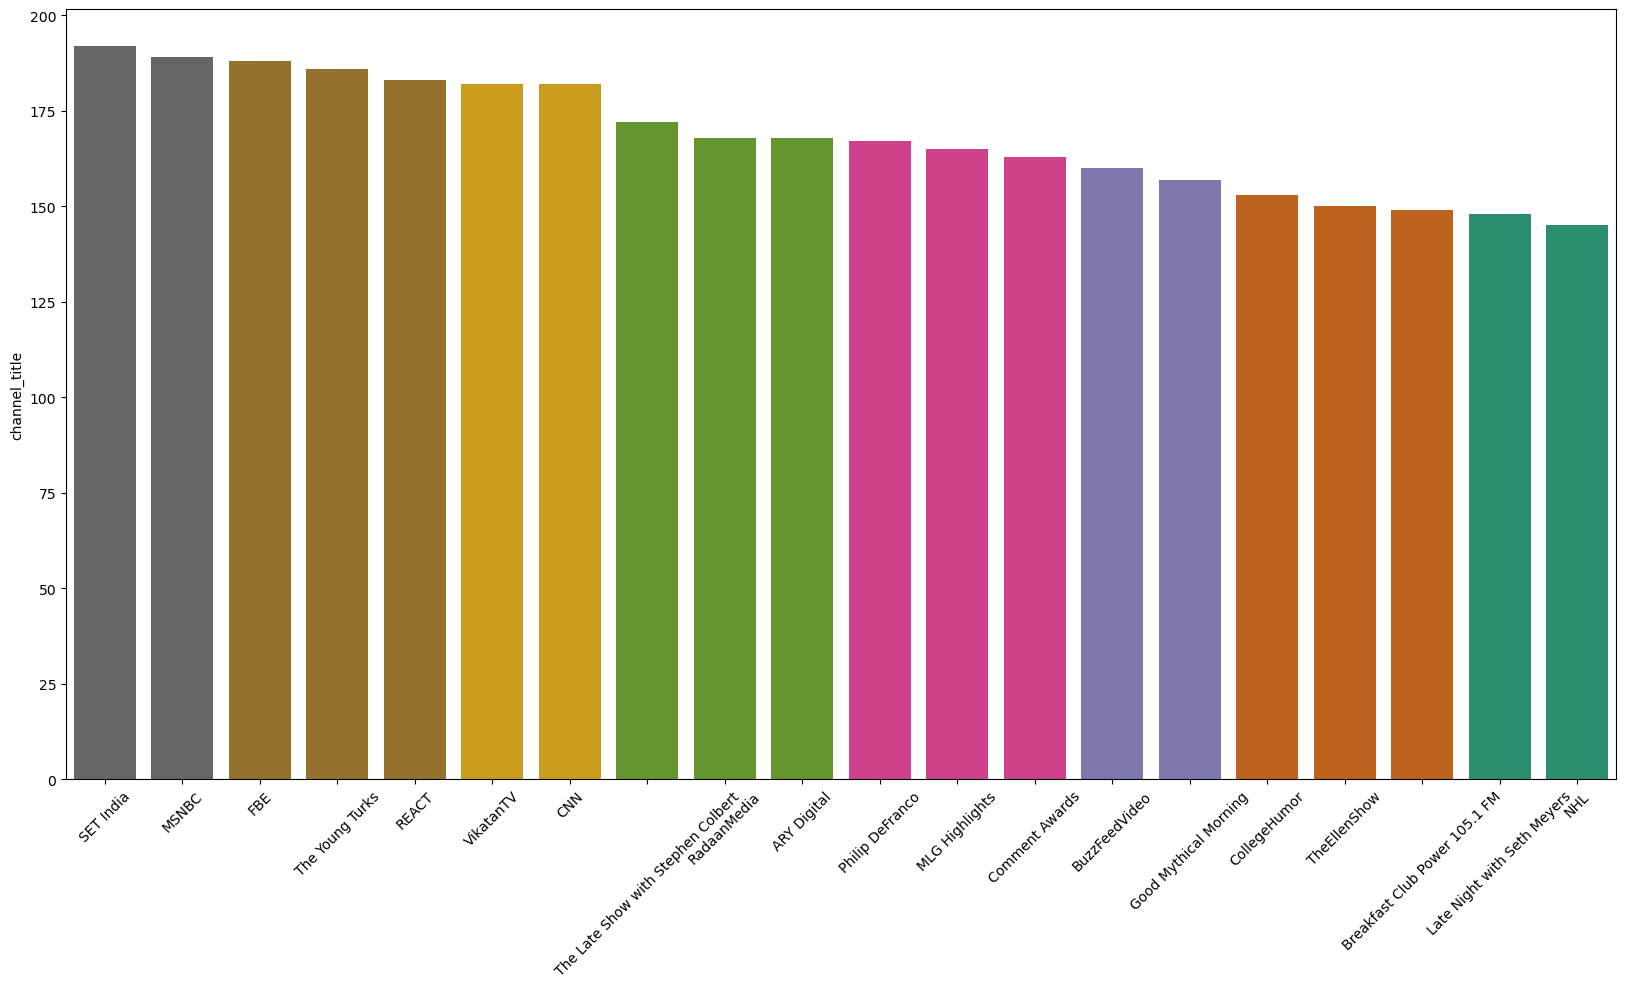

In [159]:
plt.figure(figsize = (20, 10))
plt.xticks(rotation = 45)
sns.barplot(x = df['channel_title'].value_counts()[: 20].index, y = df['channel_title'].value_counts()[: 20], palette = 'Dark2_r')

Looking at the channel titles present in the data, we can see that there are various shows and their associated titles included.

In [160]:
df['channel_title']

0              EminemVEVO
1               iDubbbzTV
2            Rudy Mancuso
3                nigahiga
4              Ed Sheeran
               ...       
40876     Annoying Orange
40877    Elhiwar Ettounsi
40878      Kingdom Hearts
40879     The Young Turks
40880            我愛小明星大跟班
Name: channel_title, Length: 39585, dtype: object

In [161]:
df.head()

,trending_date,title,channel_title,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,category
0,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...,Music
1,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,False,False,False,STill got a lot of packages. Probably will las...,Comedy
2,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,Comedy
3,17.14.11,I Dare You: GOING BALD!?,nigahiga,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,False,False,False,I know it's been a while since we did this sho...,Entertainment
4,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,False,False,False,🎧: https://ad.gt/yt-perfect\n💰: https://atlant...,Music


In the data, the trending year mentioned is just a '17' or a '18' rather than mentioning the full details. When looking at the full details, we'll have to convert it into a form such as '2017' or '2018' so that it becomes easier for us to understand the data and implement it in different machine learning operations and data visualization.

In [162]:
df['trending_date'][0][:2]

'17'

Using the apply function, the data is converted into the form that is quite useful for analysis so that one could get a good understanding of the trending year and the popularity of the videos respectively.

In [163]:
df['trending_year'] = df['trending_date'].apply(lambda x: '20' + x[:2])

In [164]:
df['trending_day'] = df['trending_date'].apply(lambda x: x[3: 5])

In [165]:
df.head()

,trending_date,title,channel_title,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,category,trending_year,trending_day
0,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...,Music,2017,14
1,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,False,False,False,STill got a lot of packages. Probably will las...,Comedy,2017,14
2,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,Comedy,2017,14
3,17.14.11,I Dare You: GOING BALD!?,nigahiga,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,False,False,False,I know it's been a while since we did this sho...,Entertainment,2017,14
4,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,False,False,False,🎧: https://ad.gt/yt-perfect\n💰: https://atlant...,Music,2017,14


Let us now look at the trending month to ensure that we get the results right and use them for the data analysis and different data visualizations respectively.

In [166]:
df['trending_month'] = df['trending_date'].apply(lambda x: x[6: 8])

In [167]:
df['trending_month'] 

0        11
1        11
2        11
3        11
4        11
         ..
40876    06
40877    06
40878    06
40879    06
40880    06
Name: trending_month, Length: 39585, dtype: object

### Countplot of Trending Month

Now comes the time to apply the countplot and count the total number of videos that are present for different months that are trending. Looking at the data, we can say that there are quite a less number of videos that are trending on 'June' and 'November'. The highest trending month where the videos are trending are on months 'March' and 'May' respectively.

<AxesSubplot:xlabel='trending_month', ylabel='count'>

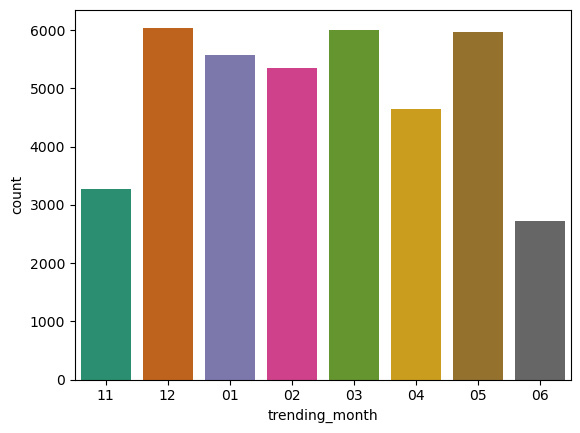

In [168]:
sns.countplot(df['trending_month'])

### Countplot of Trending Year

We have just 2 years that are present in our data. Looking at the data, most of the videos are from 2018 while a few videos are from 2017. We can also infer that we can take more data from different years to get variability in the trends and the trending years respectively just with the help of visualization.

<AxesSubplot:xlabel='trending_year', ylabel='count'>

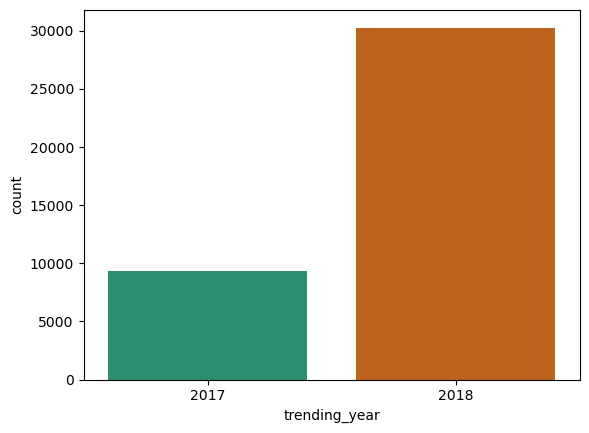

In [169]:
sns.countplot(df['trending_year'])

Let us also create new features that would ensure that those features are visualized, leading to better outputs respectively. We would create a new column such that we understand and ensure that length of the title are being created.

In [170]:
df['title_length'] = df['title'].apply(lambda x: len(x))

### Scatterplots

Scatterplots give a good idea about the spread of the data between two features. Suppose if there is a strong correlation between features, then we could find the correlation with the aid of scatterplots. If the values are negatively correlated, those values could be easily found out using scatterplots respectively. We are going to make use of scatterplots between different features and understand their correlation.

### Scatterplot of Title Length Vs Views

Taking a countplot between views and title length, one would be able to understand from the below visualization that most of the views were for the videos where the title length is about 40 - 60 words. In addition to this, we also see that as the title length keeps increasing, the number of views keeps slowly decreasing as can be seen from the below trend. Therefore, we were able to infer this by creating new features and understanding them fully.

<AxesSubplot:xlabel='views', ylabel='title_length'>

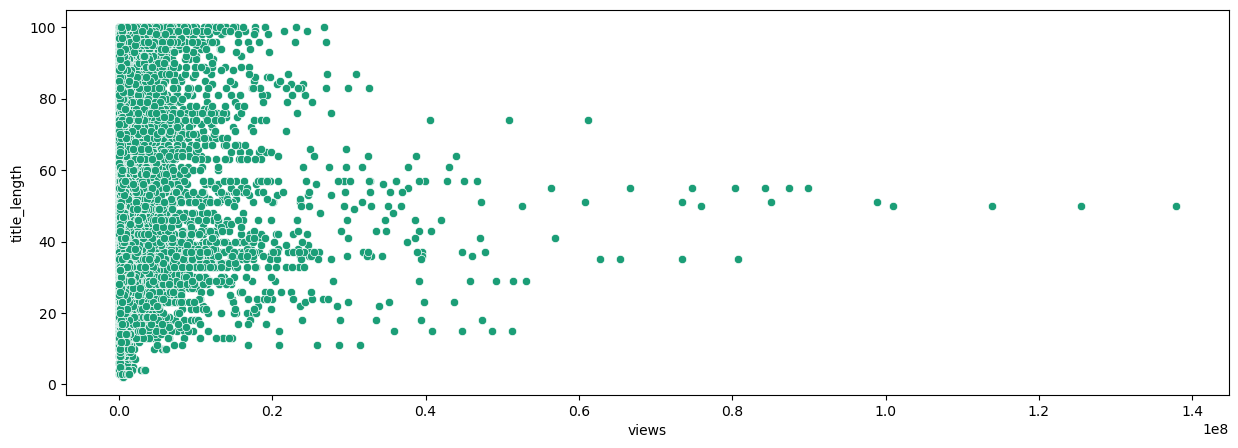

In [171]:
plt.figure(figsize = (15, 5))
sns.scatterplot(x = 'views', y = 'title_length', data = df)

### Scatterplot of Title Length Vs Likes

We can also see a similar trend for likes vs views in our data. Highest number of views were for those videos where the title length was about 30 - 60 words as can be seen.

<AxesSubplot:xlabel='likes', ylabel='title_length'>

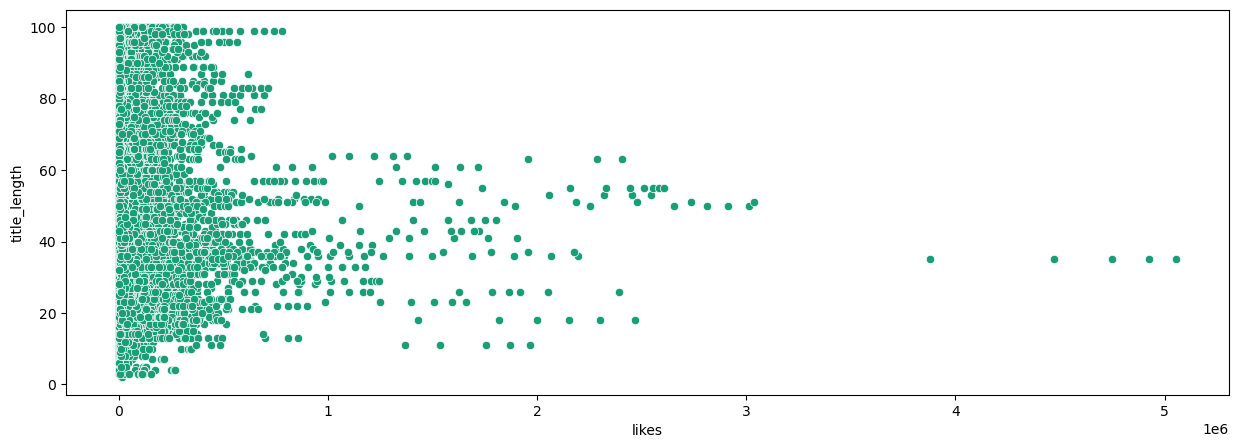

In [172]:
plt.figure(figsize = (15, 5))
sns.scatterplot(x = 'likes', y = 'title_length', data = df)

### Scatterplot of Likes Vs Views

Let us also explore if there is a relationship between likes and views. Looking at the below plot, we can safely say that there is a good relationship between likes and views. As the likes keep increasing, there is a possiblity for views to increase and vice-versa.

<AxesSubplot:xlabel='likes', ylabel='views'>

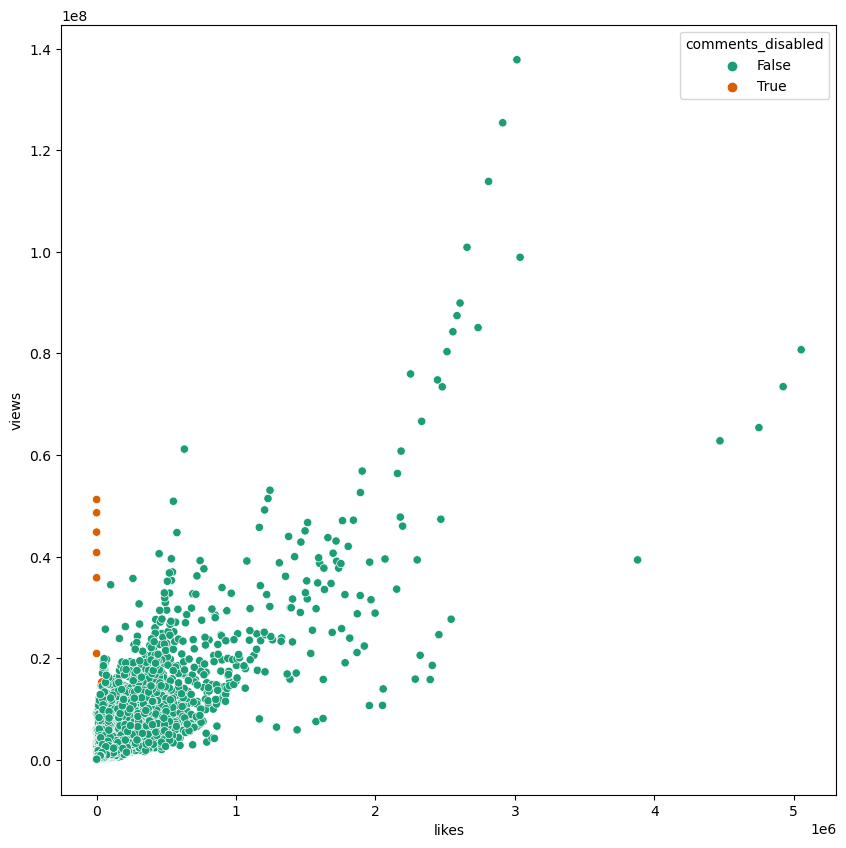

In [173]:
plt.figure(figsize = (10, 10))
sns.scatterplot(x = 'likes', y = 'views', hue = 'comments_disabled', data = df)

We would be applying the datetime library and apply it across a column so that we can treat those year, month and day as separate values respectively.

In [174]:
import datetime

In [175]:
datetime.datetime.strptime

<function datetime.strptime>

In [176]:
df['publish_year'] = df['publish_time'].apply(lambda x: datetime.datetime.strptime(x[: 10], '%Y-%m-%d').year)
df['publish_month'] = df['publish_time'].apply(lambda x: datetime.datetime.strptime(x[: 10], '%Y-%m-%d').month)
df['publish_day'] = df['publish_time'].apply(lambda x: datetime.datetime.strptime(x[: 10], '%Y-%m-%d').day)

Since we have created useful information, we would just delete the columns that we no longer need.

In [177]:
df.drop(['trending_date', 'publish_time'], axis = 1, inplace = True)

### Countplot of Comments Disabled Videos

Looking at different videos where the comments were disabled, we see that most of the comments were disabled for Entertainment type videos followed by News & Politics video category. The least amount of videos that were disabled were from Gaming and Autos & Vehicles respectively.

<AxesSubplot:xlabel='category', ylabel='count'>

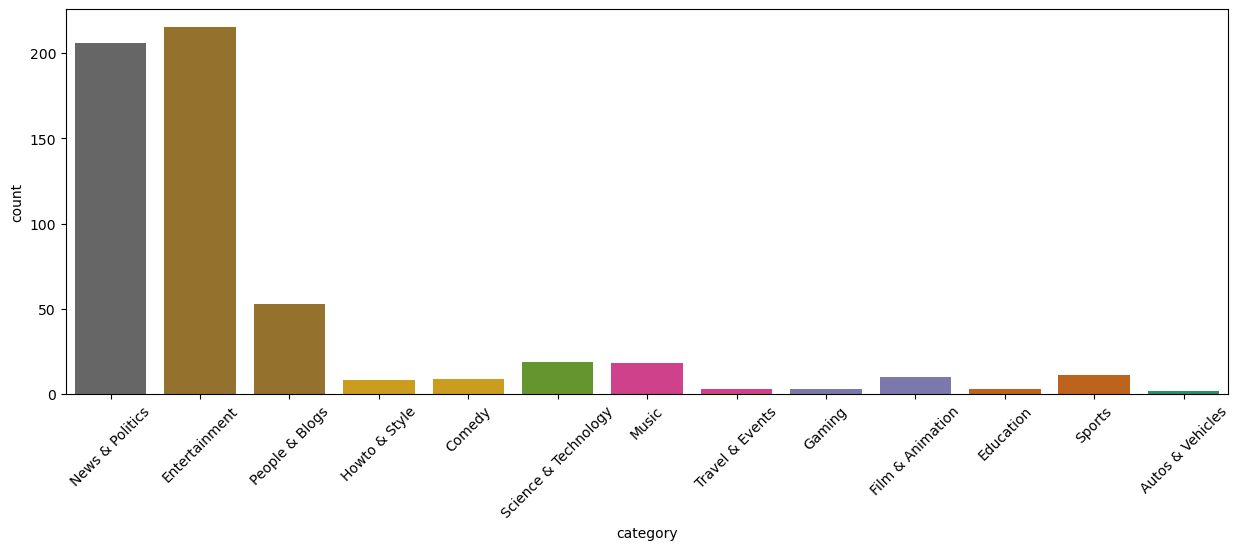

In [178]:
plt.figure(figsize = (15, 5))
plt.xticks(rotation = 45)
sns.countplot(df[df['comments_disabled'] == 1]['category'], palette = 'Dark2_r')

### Countplot of Ratings Disabled Videos

We would now consider the videos where the ratings were disabled. We see below that Entertainment category videos have the most ratings disabled. The second highest is News & Politics. The least category of videos where the ratings were disabled are from Gaming and Science & Technology respectively.

<AxesSubplot:xlabel='category', ylabel='count'>

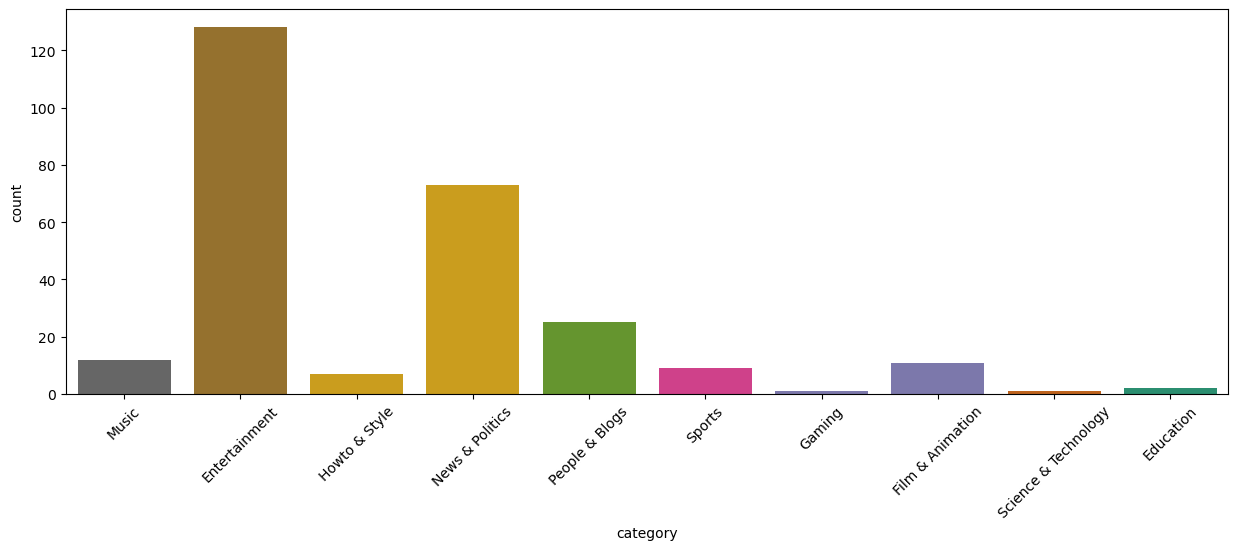

In [179]:
plt.figure(figsize = (15, 5))
plt.xticks(rotation = 45)
sns.countplot(df[df['ratings_disabled'] == 1]['category'], palette = 'Dark2_r')

We see unique publishing months respectively.

In [180]:
df['publish_month'].unique()

array([11, 10,  2, 12,  9,  3,  5,  4,  1,  8,  7,  6], dtype=int64)

We would have to map the values with the actual month strings so that we understand the data better with the help of visualization.

In [181]:
month_mapping = {1: 'January', 2: 'February', 3: 'March',4: 'April',5: 'May',6: 'June',7: 'July',8:'August',
                 9: 'September', 10: 'October',
                 11: 'November', 12: 'December'}

### Countplot of Publishing Months

Looking at different publishing months, we see that most of the videos are published in the month of March followed by May and December. There are quite a few videos that are published in the month of August, July and October.

In [182]:
month_mapping

{1: 'January',
 2: 'February',
 3: 'March',
 4: 'April',
 5: 'May',
 6: 'June',
 7: 'July',
 8: 'August',
 9: 'September',
 10: 'October',
 11: 'November',
 12: 'December'}

<AxesSubplot:xlabel='publish_month', ylabel='count'>

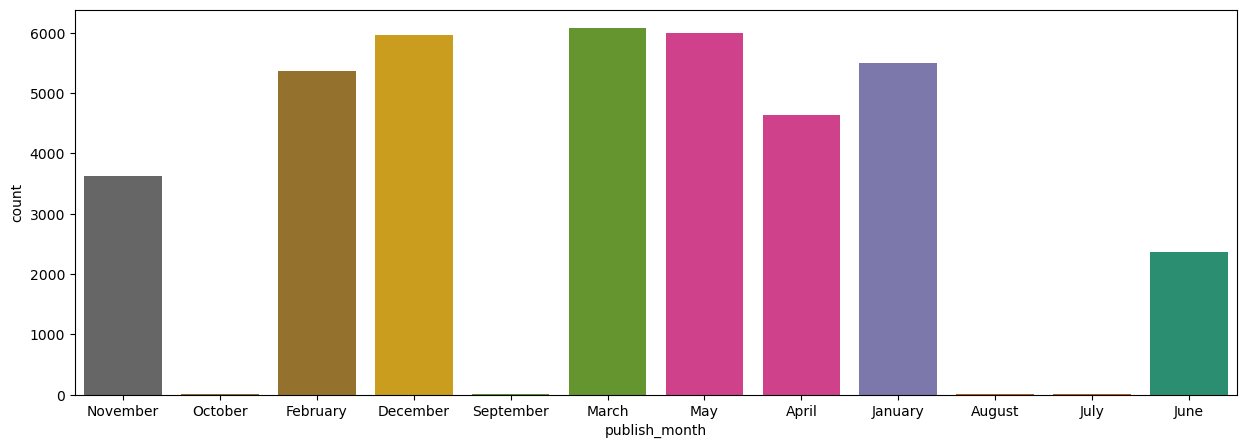

In [183]:
plt.figure(figsize = (15, 5))

sns.countplot(df['publish_month'].map(month_mapping), palette = 'Dark2_r')

We would also add a new features to count the length of the description respectively to understand it better.

In [184]:
df['description_length'] = df['description'].apply(lambda x: len(x))

### Scatterplot of Views and Description Length

As the description length increases, there is a decrease in the number of views. Therefore, if you are willing to publish a video, it would be better if you could describe the video in a short and concise manner so that the viewer could get an idea about the video.

<AxesSubplot:xlabel='views', ylabel='description_length'>

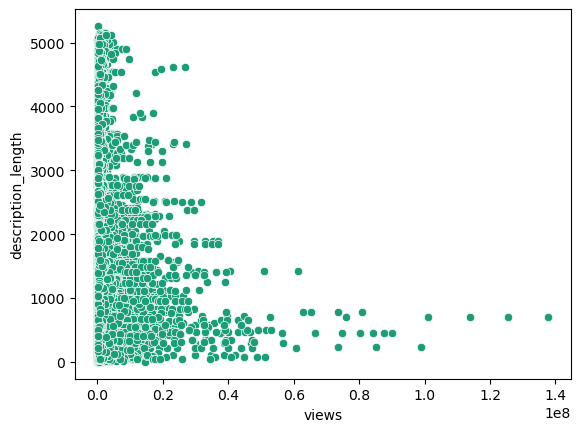

In [185]:
sns.scatterplot(x = 'views', y = 'description_length', data = df)

Creating different correlation columns in our data.

In [186]:
corr_df = df[['views', 'likes', 'dislikes', 'comment_count', 
              'trending_year', 'trending_day', 'trending_month', 'title_length', 'publish_year', 
              'publish_month', 'publish_day', 'description_length']].corr()

### Heatmap
Heatmaps are a valuable tool for visualizing numerical values using color. They are commonly used to display the results of correlation analyses conducted on data frames. The colors used in the heatmap depend on the selected color map (cmap), with higher correlation values represented by more intense colors, or vice versa. In our analysis, we have employed a heatmap to visualize the correlation values between various features.

### Heatmap of Correlation Matrix
We have plotted a heatmap of the correlation matrix so that we understand the relationships between different features in our data respectively. We see that there is a high correlation between likes and views. In addition, there is also a positive relationship between likes and comment_count. Moreover, looks like there are very low correlation values present in our data respectively.

<AxesSubplot:>

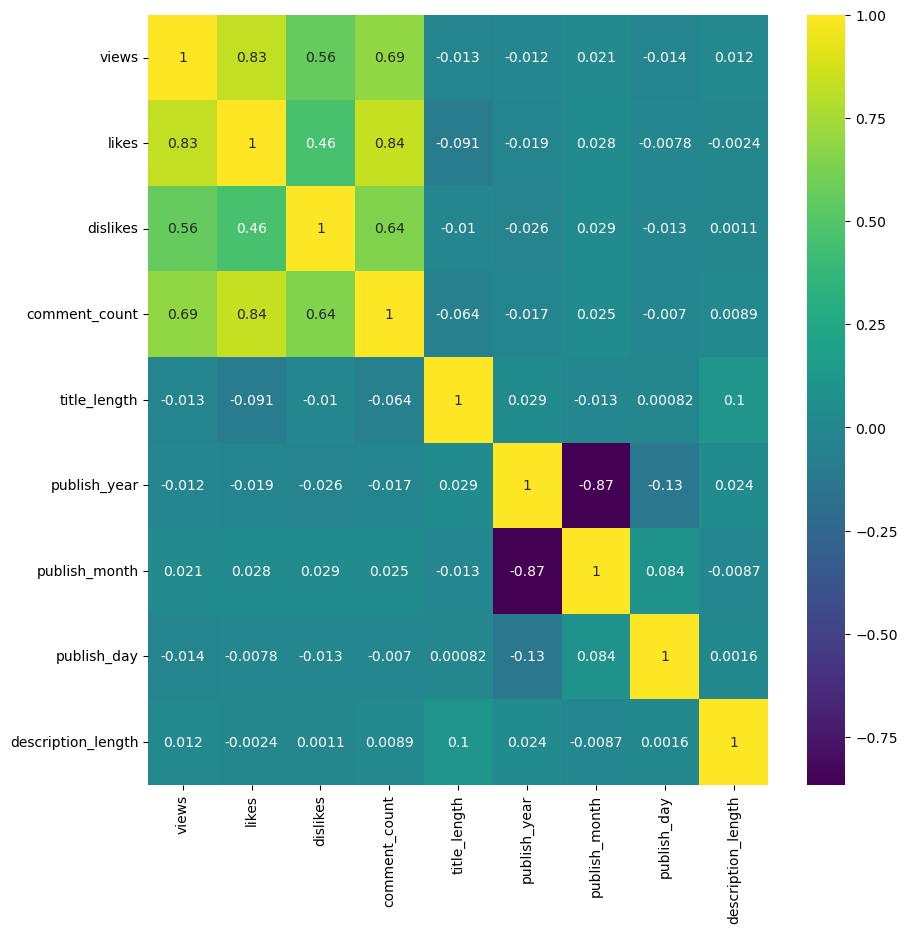

In [187]:
plt.figure(figsize = (10, 10))
sns.heatmap(corr_df, annot = True, cmap = "viridis")

### Scatterplot of Likes Vs Comments Count
Let us see based on the heatmap above the relationship between comment count and likes in our data. We see from the below scatterplot that there is a positive relationship between the values. As the comment_count increases, there is a possibility for the likes to increase respectively. But we have to also see that correlation need not always be equal to causation. Therefore, we cannot assume that having a high comment_count would cause the videos to have more likes and vice-versa respectively.

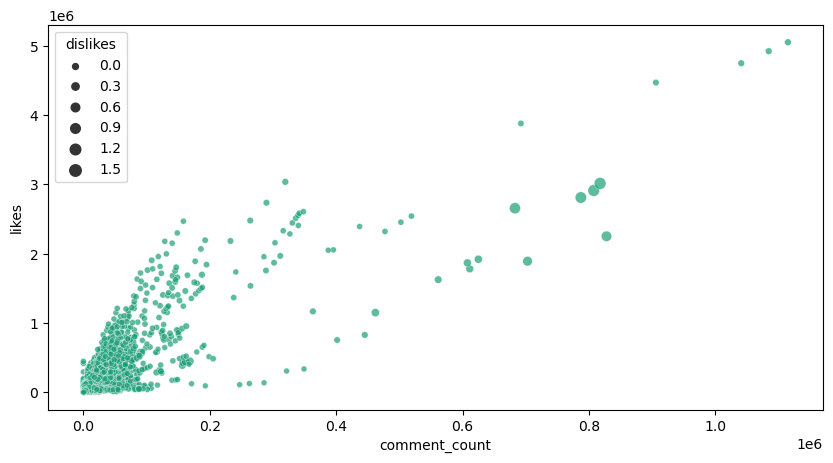

In [188]:
plt.figure(figsize = (10, 5))
sns.scatterplot(x = 'comment_count', y = 'likes', size = df['dislikes'], alpha = 0.7, data = df)
plt.show()

### Regplot of Likes Vs Comments Count
We would use a regplot to see a line that is approximation of the trend as can be seen below.

<AxesSubplot:xlabel='comment_count', ylabel='likes'>

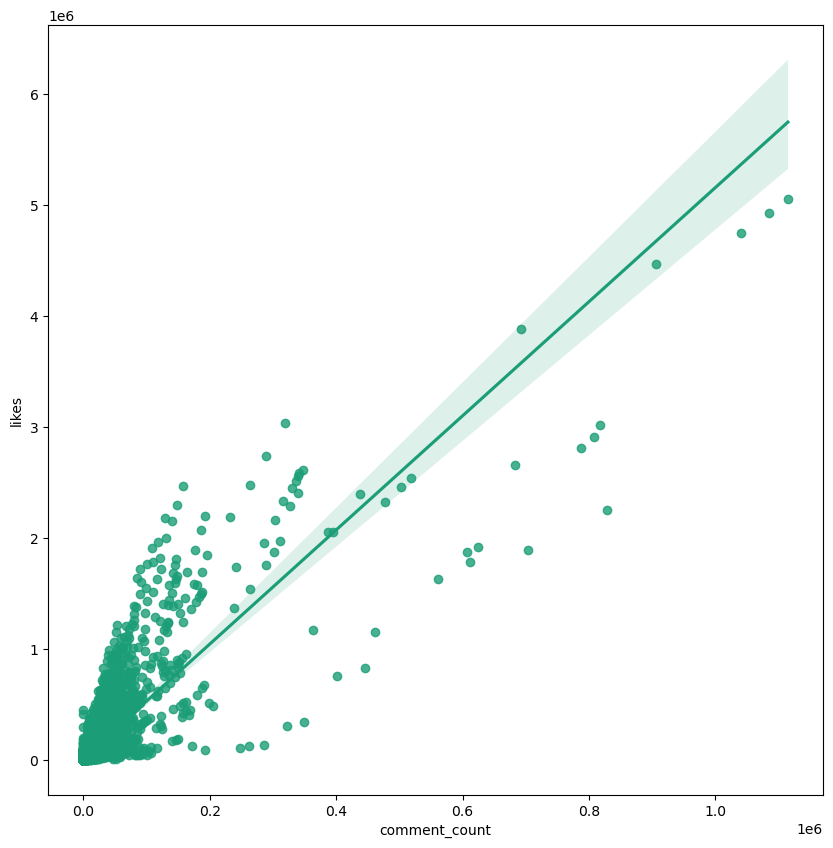

In [189]:
plt.figure(figsize = (10, 10))
sns.regplot(x = 'comment_count', y = 'likes', data = df)

### Scatterplot of Likes Vs Dislikes
Looks like there is not a much of a correlation between likes and dislikes as can be seen below.

<AxesSubplot:xlabel='likes', ylabel='dislikes'>

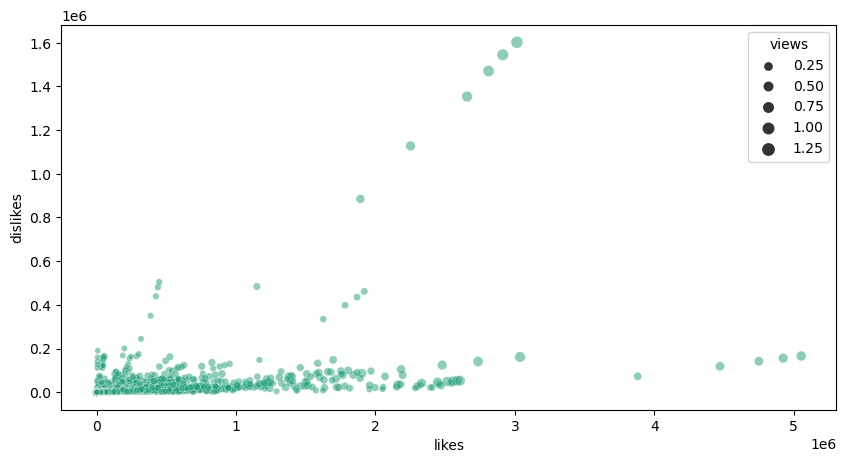

In [190]:
plt.figure(figsize = (10, 5))
sns.scatterplot(x = 'likes', y = 'dislikes', size = df['views'], alpha = 0.5, data = df)

## Conclusion
In conclusion, based on the scatterplots that we have generated, there appears to be a correlation between the number of views and the number of likes that a video receives, indicating a linear relationship between the two variables. It is noteworthy that the dataset contains a larger proportion of videos in the entertainment category compared to other categories. Furthermore, we observed that comments were predominantly disabled for videos in the entertainment category, followed by videos in the news and politics category. Our analysis also revealed that the length of a video's title and description has an impact on the number of views and likes it receives. Specifically, we found that longer titles and descriptions were less likely to result in a video becoming popular and receiving more likes, respectively.